In [1]:
from app.models import Session, Headline, Topic, Article
from app.analysis.topics import load_and_update_topics, score_headline

topics = load_and_update_topics()
topics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/mas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[Topic(id=1, name='Biden is old'),
 Topic(id=2, name='Trump is unfit'),
 Topic(id=3, name='Border Chaos'),
 Topic(id=4, name='Ukraine'),
 Topic(id=5, name='Inflation')]

In [2]:
from sqlalchemy import or_
import pandas as pd
from functools import partial
topic = topics[0]
with Session() as s:
        headlines = s.query(Headline).join(Headline.article).filter(
            or_(*[Headline.title.like(f"%{word}%") for word in topic.essential]),
            Article.topic_id == None
        ).all()
        df = pd.DataFrame([(h.id, h.title) for h in headlines], columns=['id', 'title'])
        df['score'] = df['title'].apply(partial(score_headline, topic=topic))
df

,id,title,score
0,29,Biden Turns the Screws on MAGA-Republicans ove...,0.0
1,48,"Biden blames businesses for ‘shrinkflation,’ b...",0.0
2,56,A stunning indictment could doom Republican's ...,0.0
3,73,"Putin: Biden Better for Russia Than Trump, 'Mo...",0.0
4,78,An FBI informant is charged with lying about J...,0.0
...,...,...,...
9166,199993,"After speech, Biden launches major tour plus $...",0.0
9167,199998,Biden says he would sign TikTok crackdown; Tru...,0.0
9168,200019,"Reuters World News: Biden's challenges, and ot...",0.0
9169,200047,Biden Backs Effort to Force Sale of TikTok by ...,0.0


In [3]:
df.describe()

,id,score
count,9171.000000,9171.000000
mean,107938.550649,0.006007
std,57626.640161,0.027278
min,29.000000,0.000000
25%,60833.000000,0.000000
50%,116749.000000,0.000000
75%,154331.500000,0.000000
max,200053.000000,0.333333


In [4]:
df = df.sort_values(by='score', ascending=False)

In [5]:
df.sort_values(by='score', ascending=True)[df['score'] > 0.02]

/var/folders/fd/vfz6tp5d6lg2p2jkv89sf3jm0000gn/T/ipykernel_4104/3419521607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by='score', ascending=True)[df['score'] > 0.02]


,id,title,score
513,11442,1 year after East Palestine train derailment P...,0.020833
448,9321,1 year after East Palestine train derailment P...,0.020833
562,13065,1 year after East Palestine train derailment P...,0.020833
410,8626,1 year after East Palestine train derailment P...,0.020833
527,11931,1 year after East Palestine train derailment P...,0.020833
...,...,...,...
5405,133124,Biden on Age Concerns: ‘It’s About How Old You...,0.333333
481,10264,The debate about Biden's age and mental fitness,0.333333
4535,115421,Biden's Cognitive Decline Continues Apace,0.333333
8578,193352,Biden’s Age,0.333333


(array([205.,  36.,  27.,  70.,  52., 114.,  59.,  47.,  31.,  21.,   7.,
         16.,   0.,   6.,   6.,   0.,   0.,   7.,   0.,   5.]),
 array([0.00598086, 0.02234848, 0.03871611, 0.05508373, 0.07145136,
        0.08781898, 0.1041866 , 0.12055423, 0.13692185, 0.15328947,
        0.1696571 , 0.18602472, 0.20239234, 0.21875997, 0.23512759,
        0.25149522, 0.26786284, 0.28423046, 0.30059809, 0.31696571,
        0.33333333]),
 <BarContainer object of 20 artists>)

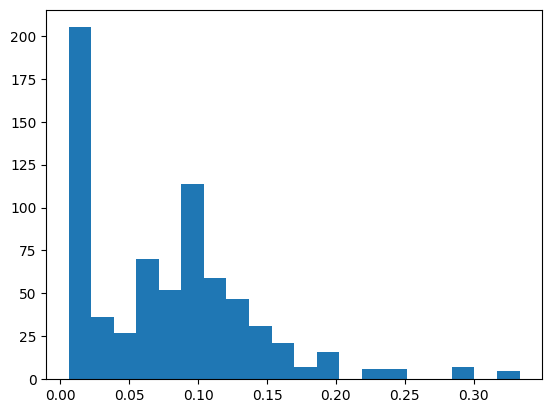

In [7]:
import matplotlib.pyplot as plt

plt.hist(df[df['score'] > 0]['score'], bins=20)